# 概率论
## 基本概率论
- 抽样(sampling)：从概率分布中抽取样本
- 分布(distribution)：对事件的概率分配
- 多项分布(multinomial distribution)：将概率分配给一些离散选择的分布

In [21]:
# 导入包
import torch
from torch.distributions import multinomial
import matplotlib.pyplot as plt
import numpy as np

# 为了抽取一个样本，即掷骰子，我们只需传入一个概率向量fair_probs。输出的是另一个相同长度的向量：它在索引i处的值是采样结果中i出现的次数
fair_probs=torch.ones([6])/6
multinomial.Multinomial(1,fair_probs).sample()


tensor([0., 0., 0., 1., 0., 0.])

In [22]:
# 通过深度学习框架同时抽取多个样本
multinomial.Multinomial(10,fair_probs).sample()

tensor([2., 1., 3., 1., 1., 2.])

In [23]:
#模拟1000次投掷
# 将结果存储为32位浮点数以进行除法
counts = multinomial.Multinomial(1000, fair_probs).sample()
counts / 1000  # 相对频率作为估计值

tensor([0.1740, 0.1730, 0.1950, 0.1530, 0.1600, 0.1450])

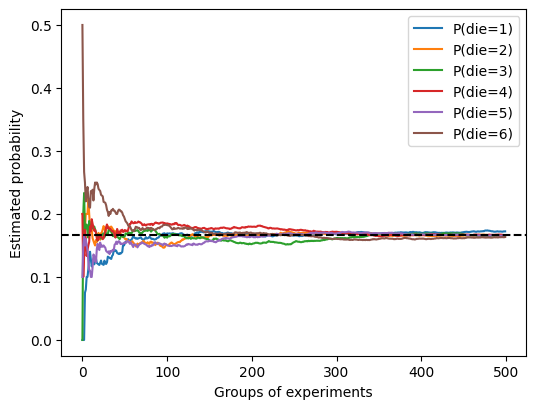

In [26]:
# 观察概率如何随时间推移收敛到真实概率，500组实验，每组抽取10个样本
counts=multinomial.Multinomial(10,fair_probs).sample((500,))
cum_counts=counts.cumsum(dim=0)
estimates=cum_counts/cum_counts.sum(dim=1,keepdims=True)
plt.figure(figsize=(6, 4.5)) 
for i in range(6):
    plt.plot(estimates[:,i].tolist(), label=("P(die="+str(i+1)+")"))
plt.axhline(y=0.167,color='black',linestyle='dashed')
plt.gca().set_xlabel('Groups of experiments')
plt.gca().set_ylabel('Estimated probability')
plt.legend();
plt.show()


### 概率论公理
- 样本空间(sample space)：所有可能事件，如S={1,2,3,4,5,6}，也叫outcome space，每个元素都是outcome
- 事件(event)：样本空间中的子集，如A={1,2,3}，B={4,5,6}，C={1,2,3,4,5,6}，如果随机实验结果在A中，则称A event发生
- 概率(probability)：事件发生概率，如P(A)=1/6，P(B)=1/6，P(C)=1，可以被认为是将集合映射到真实值的函数
  - sample space $\mathbf{S}$, event $\mathbf{A}, \mathbf{B}$, probability function $\mathbf{P}$, probability $\mathbf{P(A)}$
    - $$\mathbf{P(A)} \geq 0$$
    - $$\mathbf{P(S)} = 1$$
    - if mutually exclusive events(互斥), then
      - $$P(A \cup B) = P(A) + P(B)$$

### 随机变量(random variable)
- 随机变量是随机试验中在一组可能性中取一个值的数量，分离散(discrete, 如骰子)和连续(continuous, 如身高)两类，离散通过概率表示取值情况，连续需用密度表示区间概率

### 处理多个随机变量
- 很多时候我们会考虑多个随即变量，如需要对疾病和症状之间的关系进行建模，如“流感”、“咳嗽”，我们需要估计这些概率以及概率之间的关系

#### 联合概率(joint probability)
- 联合概率是两个随机变量同时出现的概率，$\mathbf{P}(A=a,B=b) \leq \mathbf{P}(A=a)$

#### 条件概率(conditional probability)
- From joint probability, we konw $ 0 \leq \mathbf{P}(A|B) \leq 1$, and $\mathbf{P}(A|B)=\frac{\mathbf{P}(A,B)}{\mathbf{P}(A)}$

#### 贝叶斯定理(Bayes' theorem)
- From conditional probability, we konw $\mathbf{P}(A,B)=\mathbf{P}(A|B)\mathbf{P}(B)$, and also $\mathbf{P}(A,B)=\mathbf{P}(B|A)\mathbf{P}(A)$.
  - if $\mathbf{P}(B) > 0$, we can get $\mathbf{P}(A|B)=\frac{\mathbf{P}(A|B) \mathbf{P}(A)}{\mathbf{P}(B)}$

#### 边际化(marginalization)
- 对事件概率求和，也叫求和法则(sum rule)，即B的概率相当于计算A的所有可能选择，并将所有joint probability聚合在一起  
$$ \mathbf{P}(B)=\sum_{A}\mathbf{P}(A,B) $$
-  marginalization结果的概率或分布叫做边际概率(marginal probability)或边际分布(marginal distribution)

#### 独立性
- A与B是独立的，记作$A \perp B$
- 根据Bayes' theorem，A与B是独立的，即$\mathbf{P}(A|B)=\mathbf{P}(A)$
